In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#quick statistics analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#finding null values in each column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
len(data.columns)

9

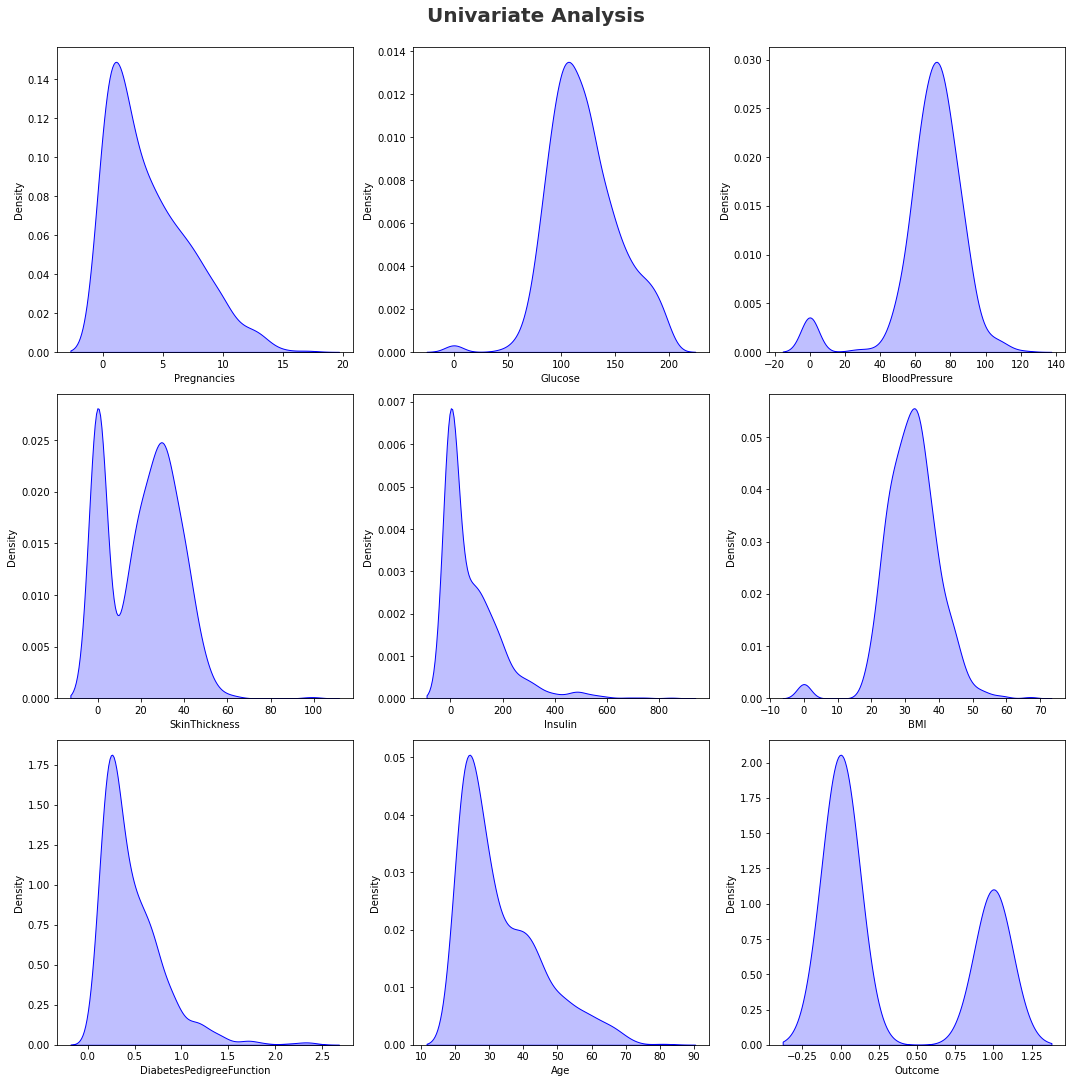

In [9]:
#kde plot for all the variable(numeric)
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis', fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(data.columns)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=data[data.columns[i]],shade=True,color='b')
    plt.xlabel(data.columns[i])
    plt.tight_layout()

In [10]:
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' has Zero as minimum values which isn't pratically right

In [11]:
#replacing Zero values with mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

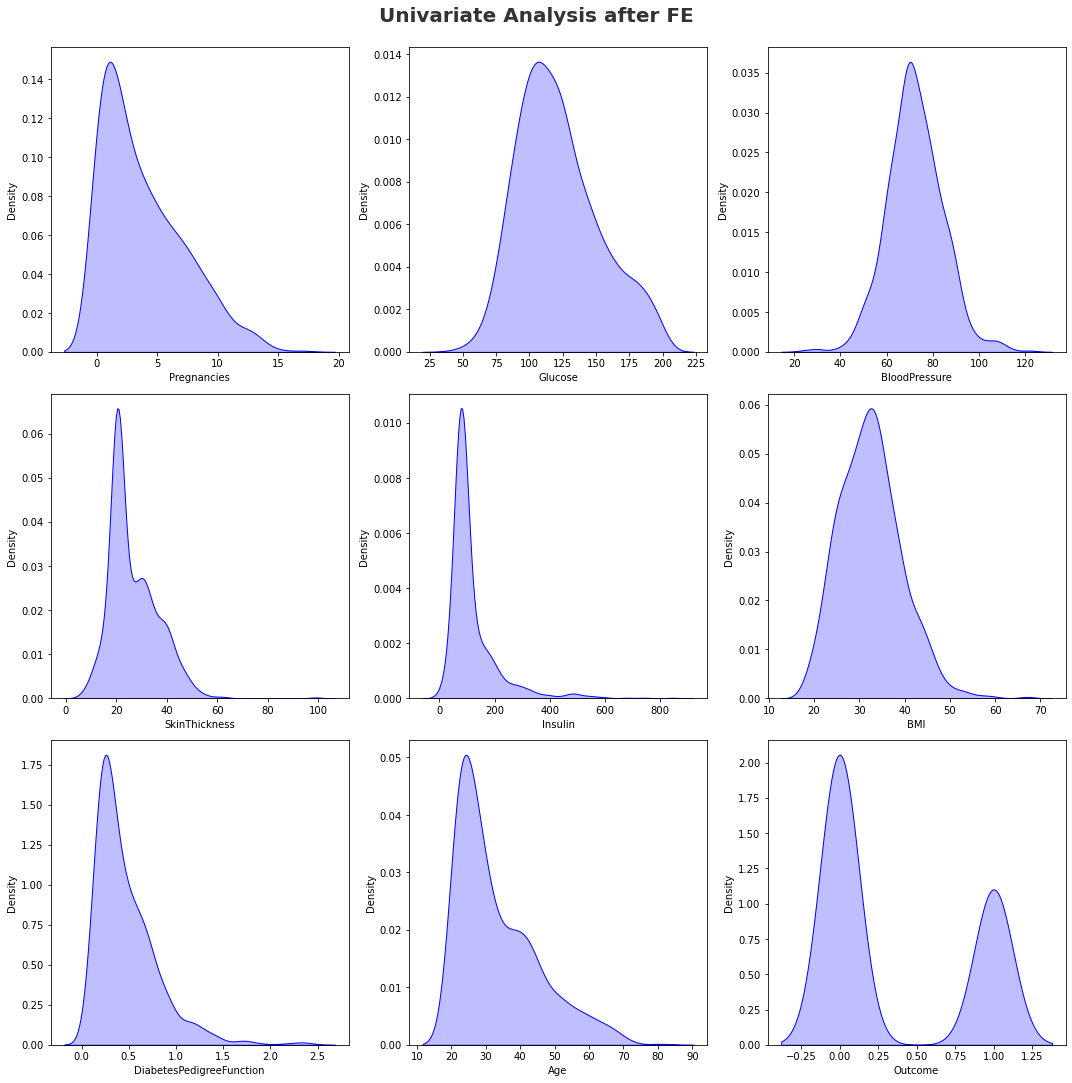

In [12]:
#kde plot for all the variable(numeric) after FE
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis after FE', fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(data.columns)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=data[data.columns[i]],shade=True,color='b')
    plt.xlabel(data.columns[i])
    plt.tight_layout()

In [13]:
#finding outliers using Boxplot

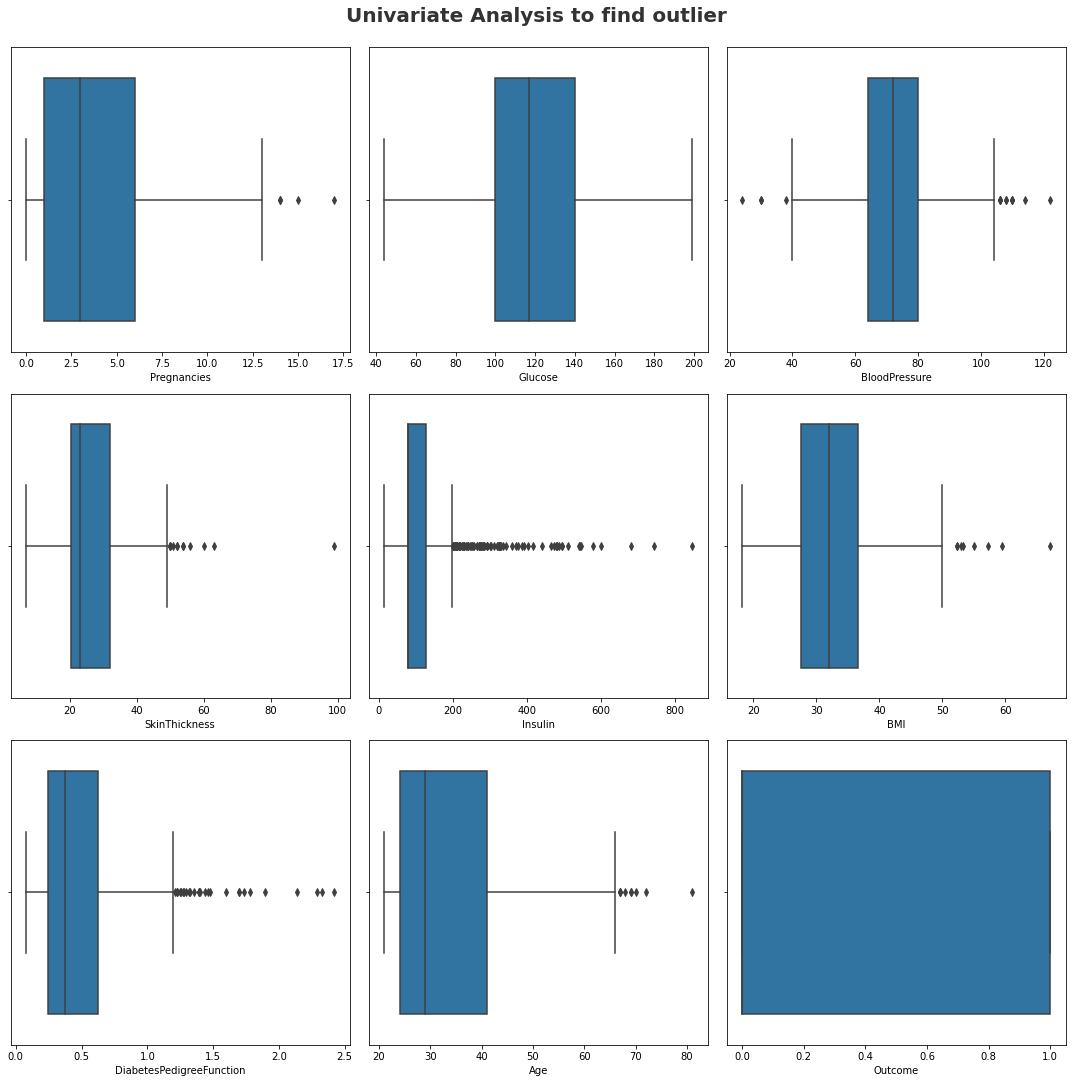

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis to find outlier', fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(data.columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=data[data.columns[i]])
    plt.xlabel(data.columns[i])
    plt.tight_layout()

<AxesSubplot:>

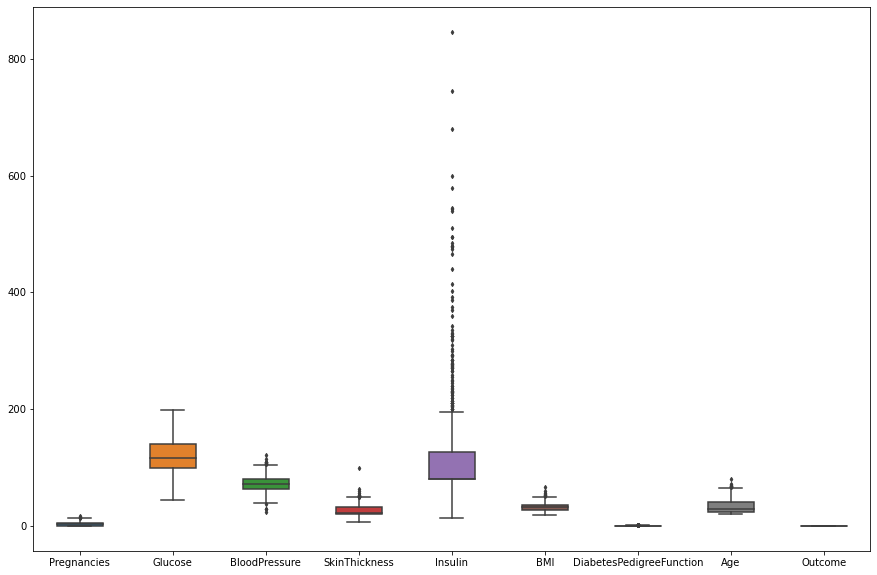

In [15]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [16]:
#Treating Outlier for Col: Insulin 
Q1=np.percentile(data['Insulin'],25,interpolation='midpoint') #25percentile
Q3=np.percentile(data['Insulin'],75,interpolation='midpoint') #75percentile
IQR=Q3-Q1 #Inter Quantile Range
print(f'Q1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
Lower_Fence=Q1-1.5*IQR
Upper_Fence=Q3+1.5*IQR
print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
u_outbound=data['Insulin'][data['Insulin']>Upper_Fence].count()
l_outbound=data['Insulin'][data['Insulin']<Lower_Fence].count()
per_out=round(u_outbound/data.shape[0]*100,2)
print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
print(f'\n Percentage of datapoint out of bound_Upper: {per_out}%')


Q1 value=79.79947916666667
Q3 value=127.5
IQR value = 47.70052083333333

Lower Fence =8.248697916666671 and Upper Fence =199.05078125

Number of data point outside Upper Fence: 89

Number of data point outside Lower Fence: 0

 Percentage of datapoint out of bound_Upper: 11.59%


In [17]:
#Treating Outlier for Col: Age 
Q1=np.percentile(data['Age'],25,interpolation='midpoint') #25percentile
Q3=np.percentile(data['Age'],75,interpolation='midpoint') #75percentile
IQR=Q3-Q1 #Inter Quantile Range
print(f'Q1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
Lower_Fence=Q1-1.5*IQR
Upper_Fence=Q3+1.5*IQR
print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
u_outbound=data['Age'][data['Age']>Upper_Fence].count()
l_outbound=data['Age'][data['Age']<Lower_Fence].count()
per_out=round(u_outbound/data.shape[0]*100,2)
print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
print(f'\n Percentage of datapoint out of bound_Upper: {per_out}%')

Q1 value=24.0
Q3 value=41.0
IQR value = 17.0

Lower Fence =-1.5 and Upper Fence =66.5

Number of data point outside Upper Fence: 9

Number of data point outside Lower Fence: 0

 Percentage of datapoint out of bound_Upper: 1.17%


In [18]:
#Treating Outlier for Col: BloodPressure 
Q1=np.percentile(data['BloodPressure'],25,interpolation='midpoint') #25percentile
Q3=np.percentile(data['BloodPressure'],75,interpolation='midpoint') #75percentile
IQR=Q3-Q1 #Inter Quantile Range
print(f'Q1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
Lower_Fence=Q1-1.5*IQR
Upper_Fence=Q3+1.5*IQR
print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
u_outbound=data['BloodPressure'][data['BloodPressure']>Upper_Fence].count()
l_outbound=data['BloodPressure'][data['BloodPressure']<Lower_Fence].count()
per_out=round(u_outbound/data.shape[0]*100,2)
print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
print(f'\nPercentage of datapoint out of bound_Upper: {per_out}%')

Q1 value=64.0
Q3 value=80.0
IQR value = 16.0

Lower Fence =40.0 and Upper Fence =104.0

Number of data point outside Upper Fence: 10

Number of data point outside Lower Fence: 4

Percentage of datapoint out of bound_Upper: 1.3%


In [19]:
#Treating Outlier for Col: SkinThickness
Q1=np.percentile(data['SkinThickness'],25,interpolation='midpoint') #25percentile
Q3=np.percentile(data['SkinThickness'],75,interpolation='midpoint') #75percentile
IQR=Q3-Q1 #Inter Quantile Range
print(f'Q1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
Lower_Fence=Q1-1.5*IQR
Upper_Fence=Q3+1.5*IQR
print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
u_outbound=data['SkinThickness'][data['SkinThickness']>Upper_Fence].count()
l_outbound=data['SkinThickness'][data['SkinThickness']<Lower_Fence].count()
per_out=round(u_outbound/data.shape[0]*100,2)
print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
print(f'\nPercentage of datapoint out of bound_Upper: {per_out}%')

Q1 value=20.536458333333332
Q3 value=32.0
IQR value = 11.463541666666668

Lower Fence =3.341145833333332 and Upper Fence =49.1953125

Number of data point outside Upper Fence: 12

Number of data point outside Lower Fence: 0

Percentage of datapoint out of bound_Upper: 1.56%


In [20]:
#Treating Outlier for Col: BMI
Q1=np.percentile(data['BMI'],25,interpolation='midpoint') #25percentile
Q3=np.percentile(data['BMI'],75,interpolation='midpoint') #75percentile
IQR=Q3-Q1 #Inter Quantile Range
print(f'Q1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
Lower_Fence=Q1-1.5*IQR
Upper_Fence=Q3+1.5*IQR
print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
u_outbound=data['BMI'][data['BMI']>Upper_Fence].count()
l_outbound=data['BMI'][data['BMI']<Lower_Fence].count()
per_out=round(u_outbound/data.shape[0]*100,2)
print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
print(f'\nPercentage of datapoint out of bound_Upper: {per_out}%')

Q1 value=27.5
Q3 value=36.6
IQR value = 9.100000000000001

Lower Fence =13.849999999999998 and Upper Fence =50.25

Number of data point outside Upper Fence: 8

Number of data point outside Lower Fence: 0

Percentage of datapoint out of bound_Upper: 1.04%


In [21]:
#Treating Outlier for Col: Pregnancies
Q1=np.percentile(data['Pregnancies'],25,interpolation='midpoint') #25percentile
Q3=np.percentile(data['Pregnancies'],75,interpolation='midpoint') #75percentile
IQR=Q3-Q1 #Inter Quantile Range
print(f'Q1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
Lower_Fence=Q1-1.5*IQR
Upper_Fence=Q3+1.5*IQR
print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
u_outbound=data['Pregnancies'][data['Pregnancies']>Upper_Fence].count()
l_outbound=data['Pregnancies'][data['Pregnancies']<Lower_Fence].count()
per_out=round(u_outbound/data.shape[0]*100,2)
print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
print(f'\nPercentage of datapoint out of bound_Upper: {per_out}%')

Q1 value=1.0
Q3 value=6.0
IQR value = 5.0

Lower Fence =-6.5 and Upper Fence =13.5

Number of data point outside Upper Fence: 4

Number of data point outside Lower Fence: 0

Percentage of datapoint out of bound_Upper: 0.52%


In [22]:
#Treating Outlier for Col: DiabetesPedigreeFunction
Q1=np.percentile(data['DiabetesPedigreeFunction'],25,interpolation='midpoint') #25percentile
Q3=np.percentile(data['DiabetesPedigreeFunction'],75,interpolation='midpoint') #75percentile
IQR=Q3-Q1 #Inter Quantile Range
print(f'Q1 value={Q1}\nQ3 value={Q3}\nIQR value = {IQR}')
Lower_Fence=Q1-1.5*IQR
Upper_Fence=Q3+1.5*IQR
print(f'\nLower Fence ={Lower_Fence} and Upper Fence ={Upper_Fence}')
u_outbound=data['DiabetesPedigreeFunction'][data['DiabetesPedigreeFunction']>Upper_Fence].count()
l_outbound=data['DiabetesPedigreeFunction'][data['DiabetesPedigreeFunction']<Lower_Fence].count()
per_out=round(u_outbound/data.shape[0]*100,2)
print(f'\nNumber of data point outside Upper Fence: {u_outbound}')
print(f'\nNumber of data point outside Lower Fence: {l_outbound}')
print(f'\nPercentage of datapoint out of bound_Upper: {per_out}%')

Q1 value=0.2435
Q3 value=0.6265000000000001
IQR value = 0.38300000000000006

Lower Fence =-0.3310000000000001 and Upper Fence =1.201

Number of data point outside Upper Fence: 29

Number of data point outside Lower Fence: 0

Percentage of datapoint out of bound_Upper: 3.78%


In [45]:
q=data['Pregnancies'].quantile(0.9948)
data_clean=data[data['Pregnancies']<q]
q=data['BMI'].quantile(0.9896)
data_clean=data[data['BMI']<q]
q=data['SkinThickness'].quantile(0.944)
data_clean=data[data['SkinThickness']<q]
q=data['Insulin'].quantile(0.8841)
print(q) ##Restricted to 6% removal only use 0.94
data_clean=data[data['Insulin']<q]
q=data['DiabetesPedigreeFunction'].quantile(0.9622)
data_clean=data[data['DiabetesPedigreeFunction']<q]
q=data['Age'].quantile(0.9883)
data_clean=data[data['Age']<q]

196.41879999999992


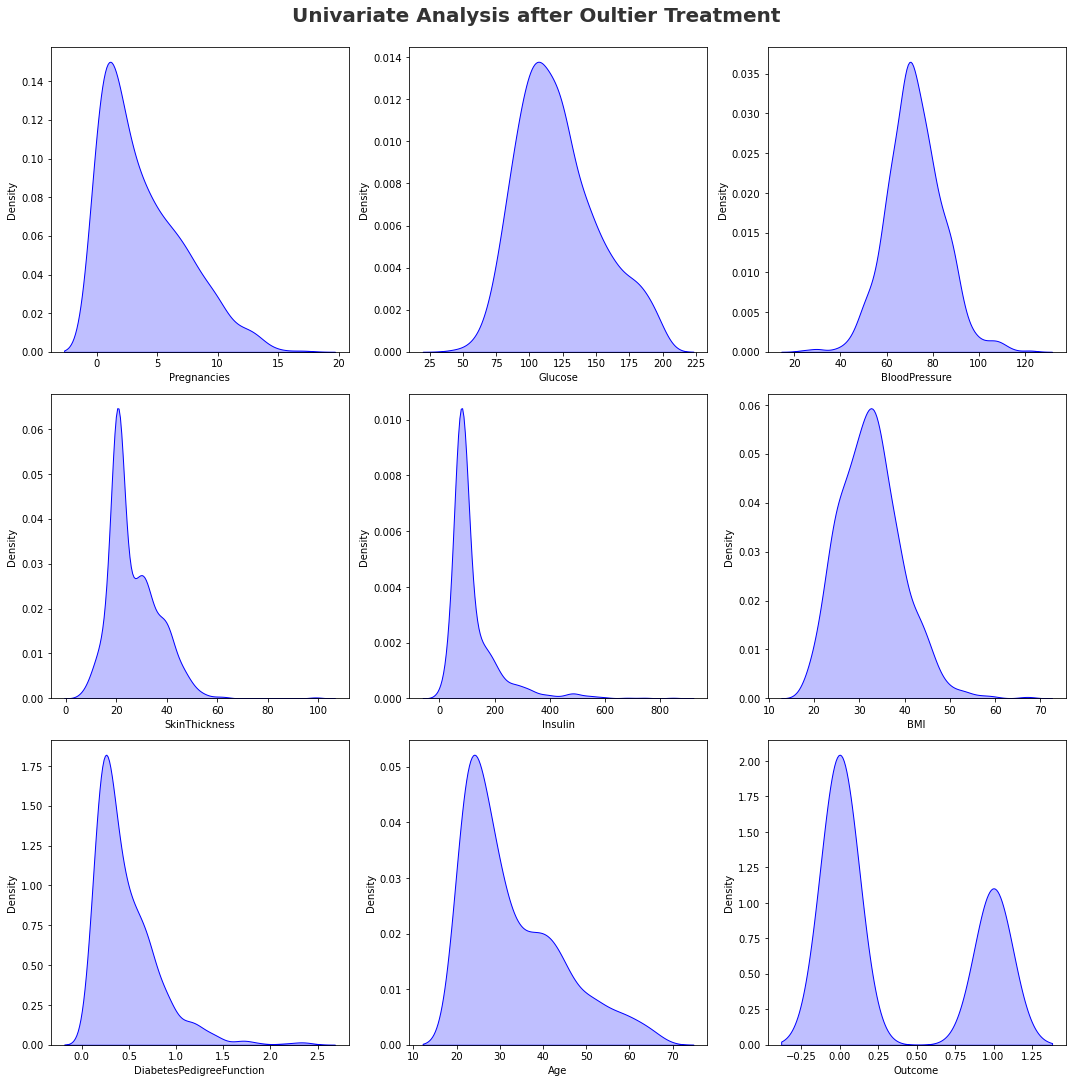

In [46]:
#kde plot for all the variable(numeric) after Outlier treatment
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis after Oultier Treatment', fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(data_clean.columns)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=data_clean[data_clean.columns[i]],shade=True,color='b')
    plt.xlabel(data_clean.columns[i])
    plt.tight_layout()

In [47]:
X=data_clean.drop(columns=['Outcome'])
y=data_clean['Outcome']

In [49]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

In [50]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shara\anacond

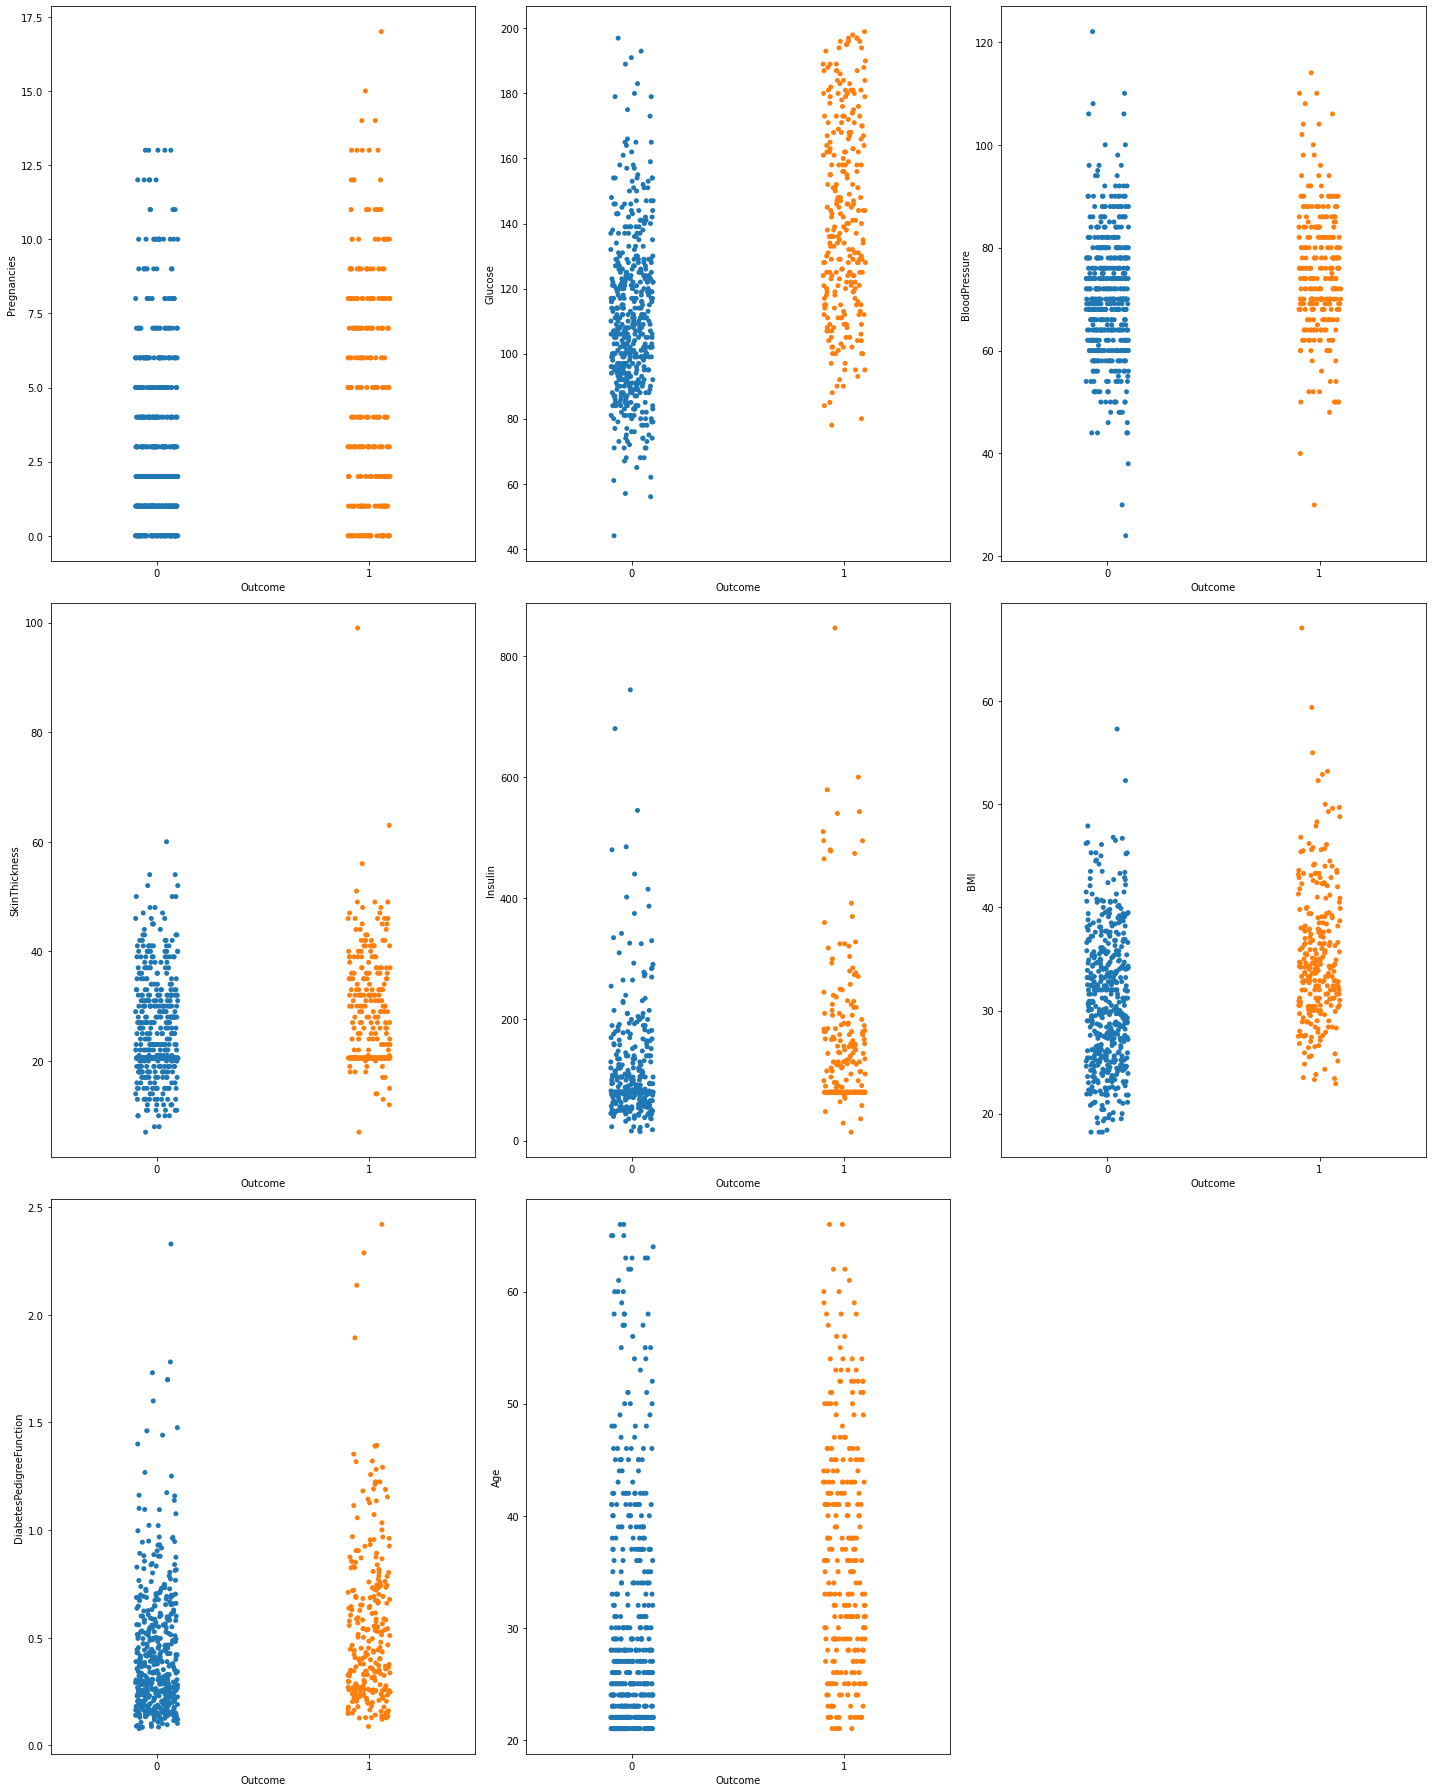

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for i in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[i])
    plotnumber+=1
plt.tight_layout()

In [51]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [52]:
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.25, random_state=355)

In [54]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred=log_reg.predict(X_test)

In [56]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

# Performance Matrices

In [57]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[106,  17],
       [ 28,  39]], dtype=int64)

In [58]:
TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]

In [59]:
TP,FP,FN,TN

(106, 17, 28, 39)

In [38]:
accuracy_score(y_test,y_pred)

0.7631578947368421

In [39]:
Precision= TP/(TP+FP)
Precision

0.8617886178861789

In [40]:
Recall=TP/(TP+FN)
Recall

0.7910447761194029

In [41]:
F1_score= 2*(Precision*Recall)/(Precision+Recall)
F1_score

0.8249027237354086